# Problem statement: You are a data scientist in a start-up culture with the potential to have a very large impact on the business. Oh, and you are backed up by a company with 140 years' business experience.


## Curious? Great! You are the kind of person we are looking for.
## Prudential, one of the largest issuers of life insurance in the USA, is hiring passionate data scientists to join a newly-formed Data Science group solving complex challenges and identifying opportunities. The results have been impressive so far but they want more.

## In a one-click shopping world with on-demand everything, the life insurance application process is antiquated. Customers provide extensive information to identify risk classification and eligibility, including scheduling medical exams, a process that takes an average of 30 days.

## The result? People are turned off. That’s why only 40% of U.S. households own individual life insurance. Prudential wants to make it quicker and less labor intensive for new and existing customers to get a quote while maintaining privacy boundaries.
## By developing a predictive model that accurately classifies risk using a more automated approach, you can greatly impact public perception of the industry.


## The results will help Prudential better understand the predictive power of the data points in the existing assessment, enabling them to significantly streamline the process.

So basically we are building a ml model that will predict wheather the application will be rejected or accepted and we will also explain the reason behind the acceptance or rejection of an instance

Let's go through the features that are involved in the prediction to better under stand the dataset

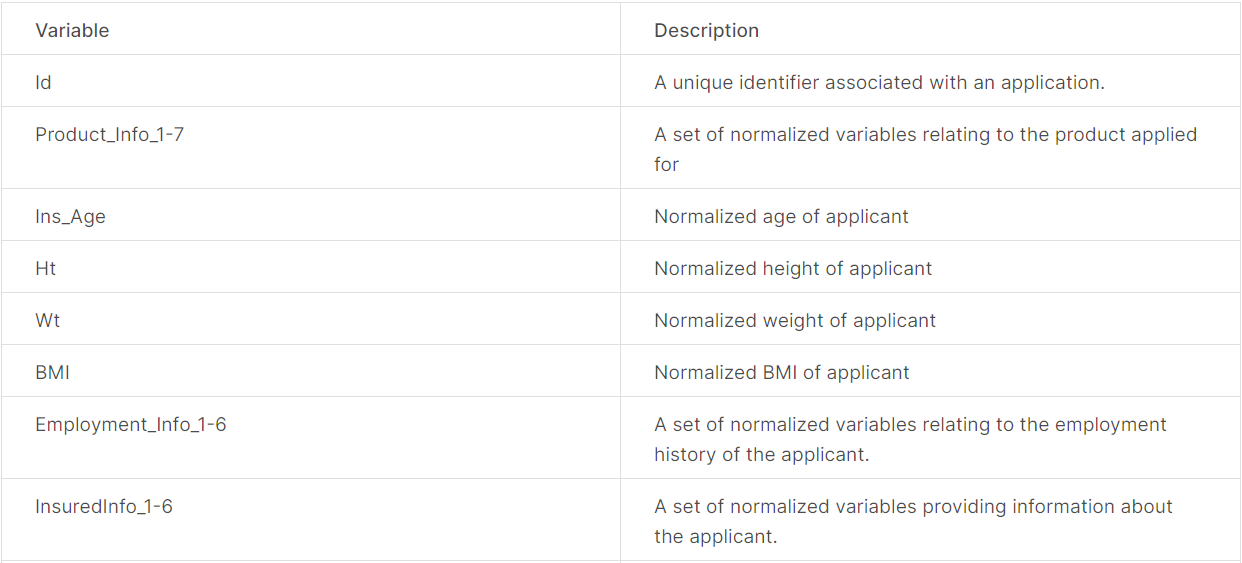

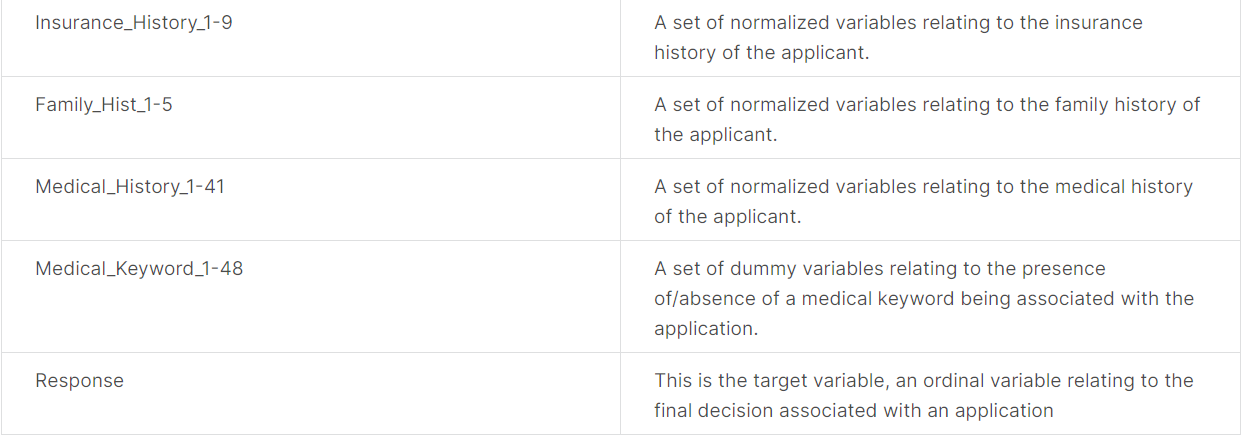

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
insurance_df = pd.read_csv('/content/drive/MyDrive/Copy of train.csv')

In [12]:
insurance_df.head()

Id  Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
0   2               1             D3              10        0.076923   
1   5               1             A1              26        0.076923   
2   6               1             E1              26        0.076923   
3   7               1             D4              10        0.487179   
4   8               1             D2              26        0.230769   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  ...  \
0               2               1               1  0.641791  0.581818  ...   
1               2               3               1  0.059701  0.600000  ...   
2               2               3               1  0.029851  0.745455  ...   
3               2               3               1  0.164179  0.672727  ...   
4               2               3               1  0.417910  0.654545  ...   

   Medical_Keyword_40  Medical_Keyword_41  Medical_Keyword_42  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_43  Medical_Keyword_44  Medical_Keyword_45  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_46  Medical_Keyword_47  Medical_Keyword_48  Response  
0                   0                   0                   0         8  
1                   0                   0                   0         4  
2                   0                   0                   0         8  
3                   0                   0                   0         8  
4                   0                   0                   0         8  

[5 rows x 128 columns]

In [13]:
insurance_df.shape

(59381, 128)

In [14]:
#Let's see the dependent variable here
insurance_df.iloc[:,-1].value_counts().sort_index()

1     6207
2     6552
3     1013
4     1428
5     5432
6    11233
7     8027
8    19489
Name: Response, dtype: int64

In [15]:
# let's see if it has any null values
insurance_df.Response.isnull().sum()

0

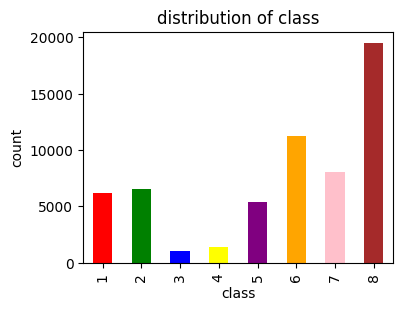

In [16]:
plt.figure(figsize = (4,3))
color = ["red", "green", "blue", "yellow", "purple", "orange", "pink", "brown"]
# making a quick graph
insurance_df['Response'].value_counts().sort_index().plot(kind = 'bar', color = color )
plt.title('distribution of class')
plt.xlabel('class')
plt.ylabel('count')
plt.show()

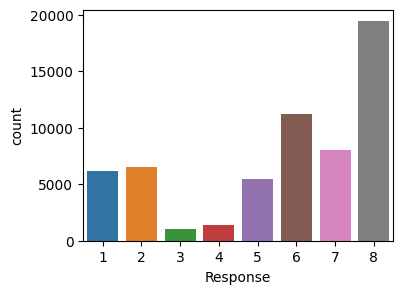

In [17]:
#We can also do then same in  less line of code
plt.figure(figsize = (4,3))
sns.countplot(x = insurance_df.Response)
plt.show()

In [18]:
#We can see that the we there are more counts of class 8
# let's convert into into a binary response
insurance_df['Response'].apply(lambda x: 1 if x == 8 else 0)#.value_counts()
# either you can do it this way or write a function pass the funciton in df

0        1
1        0
2        1
3        1
4        1
        ..
59376    0
59377    0
59378    1
59379    1
59380    0
Name: Response, Length: 59381, dtype: int64

In [19]:
def binary_converter(df):
  if df['Response'] == 8:
    value = 1
  else:
    value = 0
  return value

In [20]:
insurance_df[insurance_df.Response == 0 | -1] # checking if we have entries like 0 or -1

Empty DataFrame
Columns: [Id, Product_Info_1, Product_Info_2, Product_Info_3, Product_Info_4, Product_Info_5, Product_Info_6, Product_Info_7, Ins_Age, Ht, Wt, BMI, Employment_Info_1, Employment_Info_2, Employment_Info_3, Employment_Info_4, Employment_Info_5, Employment_Info_6, InsuredInfo_1, InsuredInfo_2, InsuredInfo_3, InsuredInfo_4, InsuredInfo_5, InsuredInfo_6, InsuredInfo_7, Insurance_History_1, Insurance_History_2, Insurance_History_3, Insurance_History_4, Insurance_History_5, Insurance_History_7, Insurance_History_8, Insurance_History_9, Family_Hist_1, Family_Hist_2, Family_Hist_3, Family_Hist_4, Family_Hist_5, Medical_History_1, Medical_History_2, Medical_History_3, Medical_History_4, Medical_History_5, Medical_History_6, Medical_History_7, Medical_History_8, Medical_History_9, Medical_History_10, Medical_History_11, Medical_History_12, Medical_History_13, Medical_History_14, Medical_History_15, Medical_History_16, Medical_History_17, Medical_History_18, Medical_History_19, Medical_History_20, Medical_History_21, Medical_History_22, Medical_History_23, Medical_History_24, Medical_History_25, Medical_History_26, Medical_History_27, Medical_History_28, Medical_History_29, Medical_History_30, Medical_History_31, Medical_History_32, Medical_History_33, Medical_History_34, Medical_History_35, Medical_History_36, Medical_History_37, Medical_History_38, Medical_History_39, Medical_History_40, Medical_History_41, Medical_Keyword_1, Medical_Keyword_2, Medical_Keyword_3, Medical_Keyword_4, Medical_Keyword_5, Medical_Keyword_6, Medical_Keyword_7, Medical_Keyword_8, Medical_Keyword_9, Medical_Keyword_10, Medical_Keyword_11, Medical_Keyword_12, Medical_Keyword_13, Medical_Keyword_14, Medical_Keyword_15, Medical_Keyword_16, Medical_Keyword_17, Medical_Keyword_18, Medical_Keyword_19, Medical_Keyword_20, Medical_Keyword_21, ...]
Index: []

[0 rows x 128 columns]

In [21]:
insurance_df.apply(binary_converter, axis = 1).value_counts()

0    39892
1    19489
dtype: int64

In [22]:
insurance_df['Modified_Response'] = insurance_df.apply(binary_converter, axis = 1)

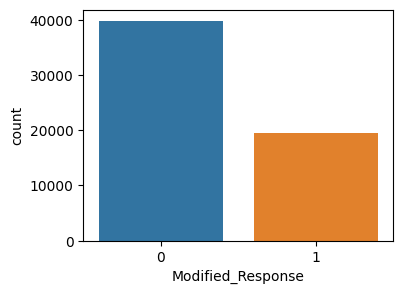

In [23]:
plt.figure(figsize = (4,3))
sns.countplot(x = insurance_df.Modified_Response)
plt.show()

In [24]:
# let's drop the Response target non
insurance_df.drop(['Response','Id'], axis = 1, inplace = True) # also drop the ID as it is an instance identifier

In [25]:
insurance_df.columns

Index(['Product_Info_1', 'Product_Info_2', 'Product_Info_3', 'Product_Info_4',
       'Product_Info_5', 'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht',
       'Wt',
       ...
       'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42',
       'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45',
       'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48',
       'Modified_Response'],
      dtype='object', length=127)

In [26]:
insurance_df.isnull().sum().sum()

393103

In [27]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 127 entries, Product_Info_1 to Modified_Response
dtypes: float64(18), int64(108), object(1)
memory usage: 57.5+ MB


In [28]:
insurance_df.isnull().sum()

Product_Info_1        0
Product_Info_2        0
Product_Info_3        0
Product_Info_4        0
Product_Info_5        0
                     ..
Medical_Keyword_45    0
Medical_Keyword_46    0
Medical_Keyword_47    0
Medical_Keyword_48    0
Modified_Response     0
Length: 127, dtype: int64

In [29]:
# we have features like Medical_keywords from 1 to 48 which are normalized so we don't have much to work on those features


In [30]:
insurance_df.describe(include = ['object', 'category']).columns

Index(['Product_Info_2'], dtype='object')

In [31]:
insurance_df.Product_Info_2.value_counts()

D3    14321
D4    10812
A8     6835
D1     6554
D2     6286
E1     2647
A1     2363
A6     2098
A2     1974
A7     1383
B2     1122
A3      977
A5      775
C3      306
C1      285
C4      219
A4      210
C2      160
B1       54
Name: Product_Info_2, dtype: int64

In [32]:
# let'drop this column as it has too many catagory which will lead to curse of dimensionality
insurance_df.drop('Product_Info_2',axis = 1 , inplace = True)

In [33]:
len(insurance_df.columns.to_list())

126

In [34]:
#let's check the mulitcolinearity in the data set
insurance_df.corr()

Product_Info_1  Product_Info_3  Product_Info_4  \
Product_Info_1            1.000000        0.027573        0.059829   
Product_Info_3            0.027573        1.000000        0.048775   
Product_Info_4            0.059829        0.048775        1.000000   
Product_Info_5            0.069720        0.025419        0.040433   
Product_Info_6           -0.078684       -0.018855       -0.089075   
...                            ...             ...             ...   
Medical_Keyword_45       -0.006719       -0.053305       -0.019914   
Medical_Keyword_46       -0.010638       -0.001538       -0.047318   
Medical_Keyword_47        0.004402       -0.017001       -0.021974   
Medical_Keyword_48       -0.008469        0.045862       -0.030896   
Modified_Response        -0.019621       -0.094939        0.174690   

                    Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age  \
Product_Info_1            0.069720       -0.078684        0.012169 -0.077429   
Product_Info_3            0.025419       -0.018855        0.015581  0.001005   
Product_Info_4            0.040433       -0.089075        0.051542 -0.261356   
Product_Info_5            1.000000       -0.045840        0.019435  0.006543   
Product_Info_6           -0.045840        1.000000       -0.015553 -0.030691   
...                            ...             ...             ...       ...   
Medical_Keyword_45       -0.002885       -0.002870        0.002267  0.043924   
Medical_Keyword_46       -0.005534        0.002609        0.008825  0.114839   
Medical_Keyword_47       -0.000320       -0.009493        0.014242  0.062636   
Medical_Keyword_48        0.004904       -0.003590        0.031756  0.138007   
Modified_Response        -0.018793       -0.022650       -0.003610 -0.221867   

                          Ht        Wt       BMI  ...  Medical_Keyword_40  \
Product_Info_1      0.052720 -0.004035 -0.037130  ...           -0.002782   
Product_Info_3      0.293546  0.213546  0.083288  ...           -0.039359   
Product_Info_4      0.141780 -0.028041 -0.129369  ...           -0.021352   
Product_Info_5      0.054495  0.022393 -0.005165  ...           -0.008326   
Product_Info_6     -0.032327  0.014683  0.039228  ...            0.017292   
...                      ...       ...       ...  ...                 ...   
Medical_Keyword_45 -0.062366 -0.027579  0.006493  ...            0.014192   
Medical_Keyword_46  0.012234  0.073164  0.084485  ...            0.012907   
Medical_Keyword_47 -0.012682  0.016217  0.029526  ...            0.021684   
Medical_Keyword_48  0.102564  0.235822  0.222586  ...            0.040558   
Modified_Response  -0.144510 -0.414030 -0.433625  ...           -0.049363   

                    Medical_Keyword_41  Medical_Keyword_42  \
Product_Info_1                0.004495           -0.007697   
Product_Info_3               -0.000005           -0.036560   
Product_Info_4               -0.015152           -0.041935   
Product_Info_5                0.011878           -0.005644   
Product_Info_6               -0.009853            0.009682   
...                                ...                 ...   
Medical_Keyword_45           -0.000252            0.033351   
Medical_Keyword_46            0.012757            0.024699   
Medical_Keyword_47            0.017060            0.046946   
Medical_Keyword_48            0.017451            0.067131   
Modified_Response            -0.008965           -0.053924   

                    Medical_Keyword_43  Medical_Keyword_44  \
Product_Info_1               -0.014055           -0.008247   
Product_Info_3                0.034787            0.002696   
Product_Info_4               -0.039131           -0.002671   
Product_Info_5                0.001135           -0.004944   
Product_Info_6               -0.009387           -0.000026   
...                                ...                 ...   
Medical_Keyword_45           -0.006628           -0.000201   
Medical_Keyword_46            0.022474            0.

<Axes: >

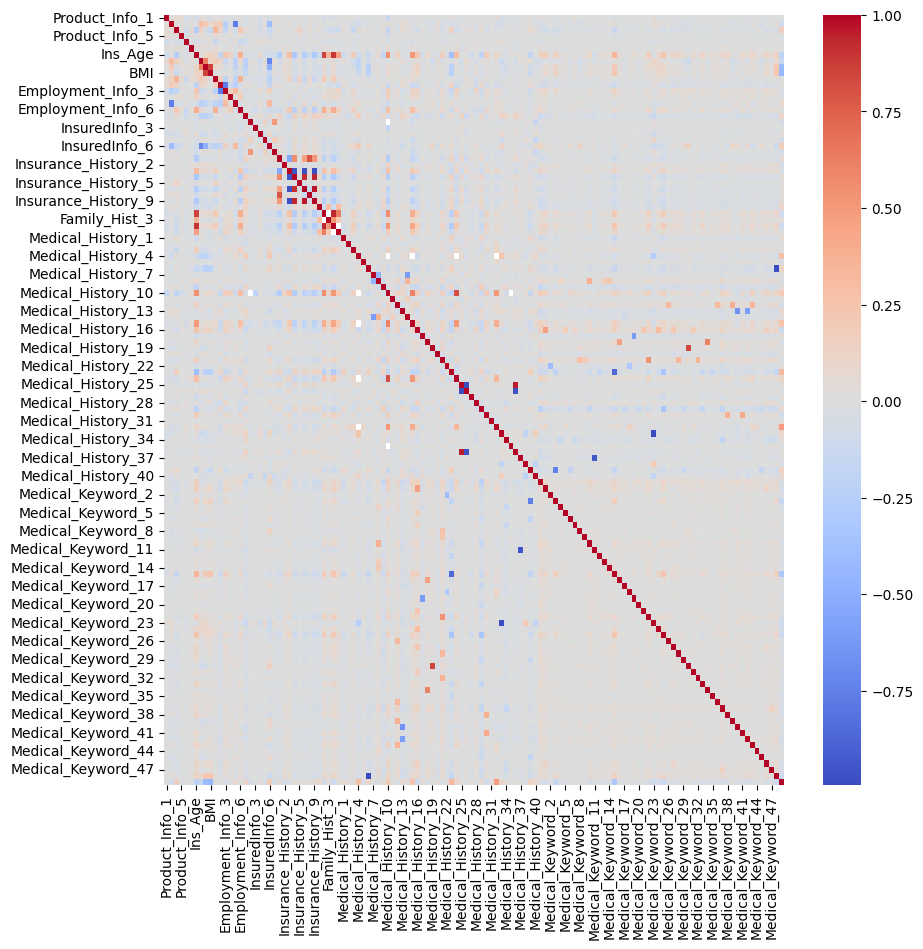

In [35]:
plt.figure(figsize = (10,10))
sns.heatmap(insurance_df.corr(),cmap = 'coolwarm')

There is no as such major mulicolinearity that we will concern our prediction and also we are using non parametric model so it can handle mulitcolinearity

In [36]:
insurance_df.Family_Hist_2.isnull().sum()

28656

In [37]:
columns = []
for i in insurance_df.columns:
  if (insurance_df[i].isnull().sum()/insurance_df.Medical_History_36.shape[0]) * 100 > 40: # null values/ total values * 100 if greater than
    columns.append(i)                                                                      # 40 then put them in list and drop them
print(columns)
insurance_df.drop(columns, axis = 1, inplace = True)

['Insurance_History_5', 'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_5', 'Medical_History_10', 'Medical_History_15', 'Medical_History_24', 'Medical_History_32']


In [38]:
insurance_df.columns.tolist()

['Product_Info_1',
 'Product_Info_3',
 'Product_Info_4',
 'Product_Info_5',
 'Product_Info_6',
 'Product_Info_7',
 'Ins_Age',
 'Ht',
 'Wt',
 'BMI',
 'Employment_Info_1',
 'Employment_Info_2',
 'Employment_Info_3',
 'Employment_Info_4',
 'Employment_Info_5',
 'Employment_Info_6',
 'InsuredInfo_1',
 'InsuredInfo_2',
 'InsuredInfo_3',
 'InsuredInfo_4',
 'InsuredInfo_5',
 'InsuredInfo_6',
 'InsuredInfo_7',
 'Insurance_History_1',
 'Insurance_History_2',
 'Insurance_History_3',
 'Insurance_History_4',
 'Insurance_History_7',
 'Insurance_History_8',
 'Insurance_History_9',
 'Family_Hist_1',
 'Family_Hist_4',
 'Medical_History_1',
 'Medical_History_2',
 'Medical_History_3',
 'Medical_History_4',
 'Medical_History_5',
 'Medical_History_6',
 'Medical_History_7',
 'Medical_History_8',
 'Medical_History_9',
 'Medical_History_11',
 'Medical_History_12',
 'Medical_History_13',
 'Medical_History_14',
 'Medical_History_16',
 'Medical_History_17',
 'Medical_History_18',
 'Medical_History_19',
 'Medica

In [39]:
# alternate method
missing_val_count_by_column = insurance_df.isnull().sum()/len(insurance_df)
type(missing_val_count_by_column)

pandas.core.series.Series

In [40]:
print(missing_val_count_by_column[missing_val_count_by_column > 0.4].sort_values(ascending = True))

Series([], dtype: float64)


In [41]:
# we will use a built in function
insurance_df = insurance_df.dropna(thresh = insurance_df.shape[0]*0.4, how = 'all', axis = 1)
# this is a built in function where thresh takes a int variable which means if the null value is thres(say 10 which means 10 null values)then
# drop the column/ row as per axis you define where axis = 1 is column and axis = 0 is row

TypeError: ignored

In [ ]:
import pandas as pd
import numpy as np

data = {'A': [1, np.nan, np.nan, 4],
        'B': [np.nan, np.nan, 3, 4],
        'C': [1, np.nan, 3, np.nan],
        'D': [np.nan, np.nan, np.nan,np.nan]}

df = pd.DataFrame(data)
display(df)
print(' ')
# Drop rows/columns where all values are NaN , for rows use axis = 0 and for columns use axis = 1
df_dropped = df.dropna(how='all',axis = 1) # axis = 0
display(df_dropped)


In [ ]:
insurance_df = insurance_df.dropna(thresh=insurance_df.shape[0]*0.4,axis=1)
insurance_df.shape

In [46]:
# Let's separte the independent and dependent variables ( this variable can take any values hence independent)
X = insurance_df.drop(labels = 'Modified_Response', axis = 1)
# let's do for dependent variable as well ( this variable values is decided by the set of independent variable hence they are called dependent variable)
Y = insurance_df['Modified_Response']

## We will not fill the missing value as there will be an information leakage We will do that once we have done train test split on the dataset
Impute Missing Values Separately: Impute missing values within the training set using statistics (mean, median, mode) computed only from that training set. Apply the same imputation strategy to the test set but use the statistics (mean, median, mode) calculated from the training set.

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 1)

In [49]:
# Let's fill the missing values now
X_train = X_train.fillna(X_train.median()) #It calculates the median separately for each column and then uses that mean to fill in the missing values within the same column.

In [50]:
X_test.shape

(14846, 117)

In [51]:

# Example training and test data
x_train = pd.DataFrame({'A': [1, 2, np.nan, 4],
                        'B': [5, np.nan, 7, 8]})

x_test = pd.DataFrame({'A': [np.nan, 2, 3, 4],
                       'B': [1, 2, np.nan, 4]})

# Calculate median of each column in X_train
median_values = x_train.median()

# Use the same median values to fill missing values in X_test
x_test_filled = x_test.fillna(median_values)

print("x_train:")
print(x_train)

print("\nX_test:")
print(x_test)

print("\nX_test_filled:")
print(x_test_filled)


x_train:
     A    B
0  1.0  5.0
1  2.0  NaN
2  NaN  7.0
3  4.0  8.0

X_test:
     A    B
0  NaN  1.0
1  2.0  2.0
2  3.0  NaN
3  4.0  4.0

X_test_filled:
     A    B
0  2.0  1.0
1  2.0  2.0
2  3.0  7.0
3  4.0  4.0


In [52]:
# we have filled the missing values in test with the permuted values of train to aviod information leakage
X_test = X_test.fillna(X_train.median())

In [53]:
X_train.isna().sum().sum(), Y_train.isna().sum().sum(), X_test.isna().sum().sum(),Y_test.isna().sum().sum()

(0, 0, 0, 0)

In [54]:
X_train.shape,Y_train.shape, X_test.shape, Y_test.shape

((44535, 117), (44535,), (14846, 117), (14846,))

# Let's first build a RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
param_dict
# we will have 54 models

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

rf_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   2.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   2.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.6s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='roc_auc', verbose=2)

In [ ]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=8, min_samples_leaf=40, min_samples_split=150,
                       n_estimators=80)

In [ ]:
rf_optimal_model = rf_grid.best_estimator_

In [ ]:
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 150,
 'n_estimators': 80}

In [ ]:
# Making predictions on train and test data

train_class_preds = rf_optimal_model.predict(X_train)
test_class_preds = rf_optimal_model.predict(X_test)


# Get the probabilities on train and test
train_preds = rf_optimal_model.predict_proba(X_train)[:,1]
test_preds = rf_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(Y_train,train_class_preds)
test_accuracy = accuracy_score(Y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.8075670820702818
The accuracy on test dataset is 0.8031793075575913


In [ ]:
# Confusion matrix for train and test
confusion_matrix(Y_train, train_class_preds)

array([[27108,  2799],
       [ 5771,  8857]])

[[TN, FP]

 [FN, TP]]


In [ ]:
# let's calcualte precision and recall for train
# precesion TP/TP+FP
9194/(9194+2982)


0.7550919842312747

In [ ]:
#recall TP/TP + FN
9194/(5434+9194)

0.6285206453377085

In [ ]:
# Let's do it for the test as well
confusion_matrix(Y_test, test_class_preds)

array([[9047,  938],
       [1984, 2877]])

[[TN, FP]

[FN, TP]]

In [ ]:
# precession TP/TP + FP consider this as this way how may times you said it's postive and how many times it was correct
2971/(2901+998)

0.7619902539112593

In [ ]:
# recall TP/ TP + FN consdier this you studied 5 chapters but were able to answer question of only 3 chaptere in exam
2971/(2971 + 1890)

0.6111911129397244

In [ ]:
# let's also calculate the roc_auc score
train_auc = roc_auc_score(Y_train, train_preds)
test_auc = roc_auc_score(Y_test, test_preds)
print(f'Train_auc is {train_auc}')
print(f'Test_auc is {test_auc}')

Train_auc is 0.8910535349858921
Test_auc is 0.8855605976337475


In [ ]:
# let's find the important features involved in the prediction
rf_optimal_model.feature_importances_

array([4.84505806e-04, 4.00040431e-03, 3.84662899e-02, 0.00000000e+00,
       2.61659758e-04, 3.20337751e-05, 3.34878395e-02, 1.56776748e-02,
       1.77163485e-01, 2.29320289e-01, 3.05560752e-03, 2.01847593e-03,
       6.86220323e-04, 4.17907089e-04, 2.11670312e-03, 1.65941574e-03,
       4.30144892e-03, 1.47120354e-03, 3.28529974e-04, 4.57938257e-04,
       5.96152157e-04, 3.86424785e-02, 2.00930726e-03, 2.37555179e-04,
       1.41059900e-03, 6.21366899e-04, 5.45349516e-04, 2.96021056e-04,
       2.33710859e-04, 2.20255149e-04, 4.10960866e-03, 1.80356324e-02,
       7.66532777e-03, 1.60084502e-03, 6.96708508e-04, 9.90192045e-02,
       5.69144728e-05, 5.05235229e-03, 2.12908060e-05, 2.81699322e-04,
       4.65127577e-04, 0.00000000e+00, 1.15088611e-04, 2.54199715e-03,
       2.77155101e-05, 7.11080830e-03, 2.73224716e-04, 1.24420721e-04,
       1.21737745e-04, 7.66715646e-04, 3.49292774e-04, 1.06876021e-07,
       9.44445248e-02, 1.66552013e-04, 2.36999973e-04, 3.83787946e-05,
      

In [ ]:
len(X_train.columns)

117

In [ ]:
# lets make a df of impoartant features
importance_df = pd.DataFrame({'features' : X_train.columns, 'feature_importances':rf_optimal_model.feature_importances_}).sort_values(by = 'feature_importances',ascending = False).reset_index(drop = True)

In [ ]:
importance_df.head()

features  feature_importances
0                 BMI             0.229320
1                  Wt             0.177163
2  Medical_Keyword_15             0.119040
3   Medical_History_4             0.099019
4  Medical_History_23             0.094445

In [ ]:
importance_df.feature_importances = round(importance_df.feature_importances,2)

In [ ]:
importance_df.head()

features  feature_importances
0                 BMI                 0.23
1                  Wt                 0.18
2  Medical_Keyword_15                 0.12
3   Medical_History_4                 0.10
4  Medical_History_23                 0.09

In [ ]:
# You can do it this way as well
# importances = rf_optimal_model.feature_importances_

# importance_dict = {'Feature' : list(X_train.columns),
#                    'Feature Importance' : importances}

# importance_df = pd.DataFrame(importance_dict)

In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=7287e8aec4c9eae715c646d05c58aca839fe8ab221964f731a1bfdb31eae2a11
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import lime
from lime.lime_tabular import LimeTabularExplainer
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Create a LimeTabularExplainer
explainer = LimeTabularExplainer(X_train.values,feature_names = X_train.columns.tolist(), mode="classification", training_labels=Y_train.values, random_state=1)


In [ ]:
  # Create the LIME Explainer
instance_to_explain = X_test.iloc[0,:]  # Replace with the specific instance you want to explain


In [ ]:
explanation = explainer.explain_instance(instance_to_explain, rf_optimal_model.predict_proba, num_features=6)
explanation.show_in_notebook()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


The lime outputs expalins that the top 6 features which made the prediction of the instance towards 0 are BMI, Medical_Keyword_15, Medical_History_4,Wt, Medical_Keyword_3, Insuredinfo_6. It also gives us the weights of the feautures and from the grap we can deduce that BMI is the most important of all

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 7.0 MB/s eta 0:00:00


In [ ]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [ ]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(rf_optimal_model) # if you don't pass the train data the shap we model sythetic data around
# and will take an average of prediction and assigne baseline prediction for every class
# please pass X_train1 and see for yourself the baseline will change


# obtain shap values for the first row of the test data
shap_values = explainer.shap_values(X_test.iloc[0])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0])

 SHAP (SHapley Additive exPlanations) values are a technique used in machine learning to understand the contribution of individual features in making predictions for a specific instance. SHAP values provide a way to explain the output of a machine learning model for a given data point by attributing the prediction to each feature's contribution.

The color of the features represents the direction of the relationship between the predictive feature and the target variable1. Our features here are in red color, which means that all these features are pushing the model’s prediction higher . In other words, they have a positive impact on the prediction(they are contributing positively towards prediction)

Tthese features are positively influencing the prediction compared to the baseline prediction. The baseline prediction is the average prediction of the model over the entire dataset. So, these red features are pushing the model's output higher than this average or baseline prediction. It's a great way to understand how each feature is contributing to the prediction for a specific instance.

In [ ]:
# this is the average value of basel line value of particular class i.e class 0 and 1
explainer.expected_value

array([0.67152801, 0.32847199])

In [ ]:
# this is the shap values (contribution of every featues towards prediction of respective class)
print(shap_values[0]) # for class 0
print(shap_values[1]) # for class 1

[-6.20609938e-05  9.96496514e-04 -3.54807535e-03  0.00000000e+00
  1.02114944e-04  4.93327645e-06  8.68524686e-03  4.23379339e-03
  3.87573759e-02  6.25810206e-02 -1.47219165e-03 -4.24124654e-04
 -2.15955783e-04  1.46347522e-05  7.17651175e-04 -6.06355747e-04
  1.01661061e-03 -6.93997454e-05 -3.63871431e-04 -5.02520210e-05
 -4.90506442e-05  1.06665611e-02 -1.24325735e-04  1.38867842e-04
 -1.11721862e-04 -1.67653208e-04 -1.98292446e-04 -7.51422770e-05
 -4.72440835e-05 -3.30304460e-05  2.92519613e-03  4.29507809e-03
  5.47643107e-03 -1.84341372e-03  2.83034503e-04  2.66761454e-02
 -4.10738105e-06 -7.21493067e-04  1.55532952e-05 -4.23265263e-05
 -4.98228688e-05  0.00000000e+00 -2.76399637e-06 -4.01647396e-04
  1.48317858e-05 -1.13527451e-03 -2.99758026e-05 -2.22741775e-05
 -6.31590443e-06 -3.14386342e-05 -1.32443971e-05 -5.98522155e-07
  4.51223639e-02  3.42237844e-05  1.18096110e-04 -4.79639559e-06
 -1.10427347e-04  1.78762344e-03 -3.66943981e-04  0.00000000e+00
 -6.99768890e-04  5.98076

The same can be represented by waterfall plot

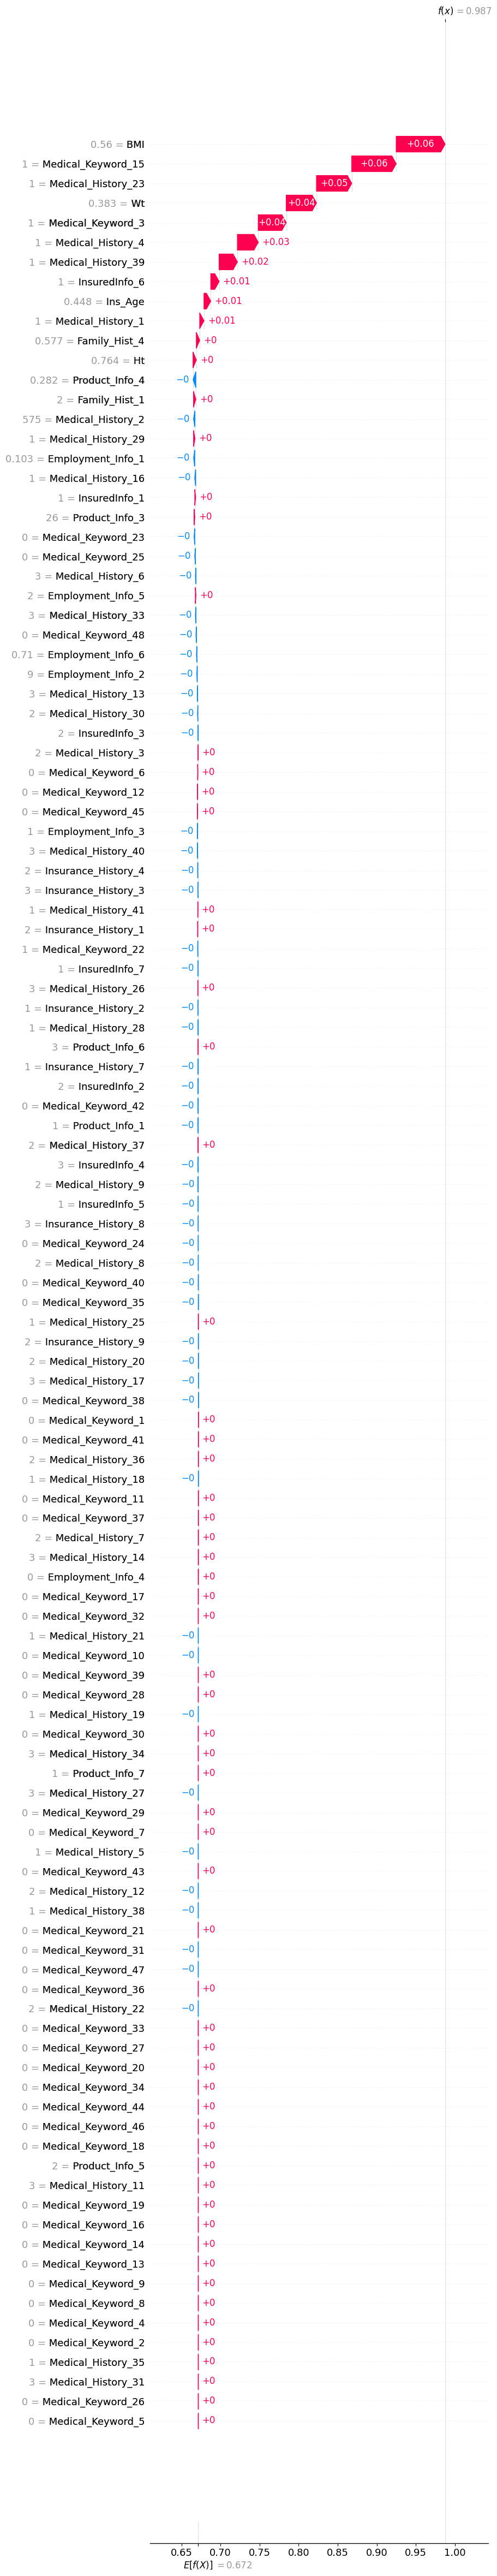

In [ ]:
# Initialize JavaScript visualizations in the notebook environment
shap.initjs()

# Define a tree explainer for the built model
explainer = shap.TreeExplainer(rf_optimal_model)

# Obtain Shap values for the first row of the test data
shap_values = explainer.shap_values(X_test.iloc[0])

# Create an Explanation object
explanation = shap.Explanation(values=shap_values[0], base_values=explainer.expected_value[0], data=X_test.iloc[0])

# Create a waterfall plot for the Shap values
shap.plots.waterfall(explanation, max_display=len(shap_values[0]), show=True)


So we are taking the baseline prediction as the center point and every feature plot is basically pushing the prediction towards left or right from the baseline prediction

Starting Point (Expected Value): The bottom of a waterfall plot starts as the expected value of the model output. This is typically the average prediction of the model over the entire dataset1.

Feature Contributions: Each row in the waterfall plot shows how the positive (red) or negative (blue) contribution of each feature moves the value from the expected model output over the background dataset to the model output for this prediction1. The SHAP value of a feature represents the impact of the evidence provided by that feature on the model’s output2.

Ordering of Features: Features are sorted by the magnitude of their SHAP values with the smallest magnitude features grouped together at the bottom of the plot when the number of features in the models exceeds a certain limit (default is 10)2.

Final Prediction: The final value at the top of the plot is the model’s prediction for this specific instance, taking into account all feature contributions1

In [ ]:
# Let's see the contribution of features at a global level

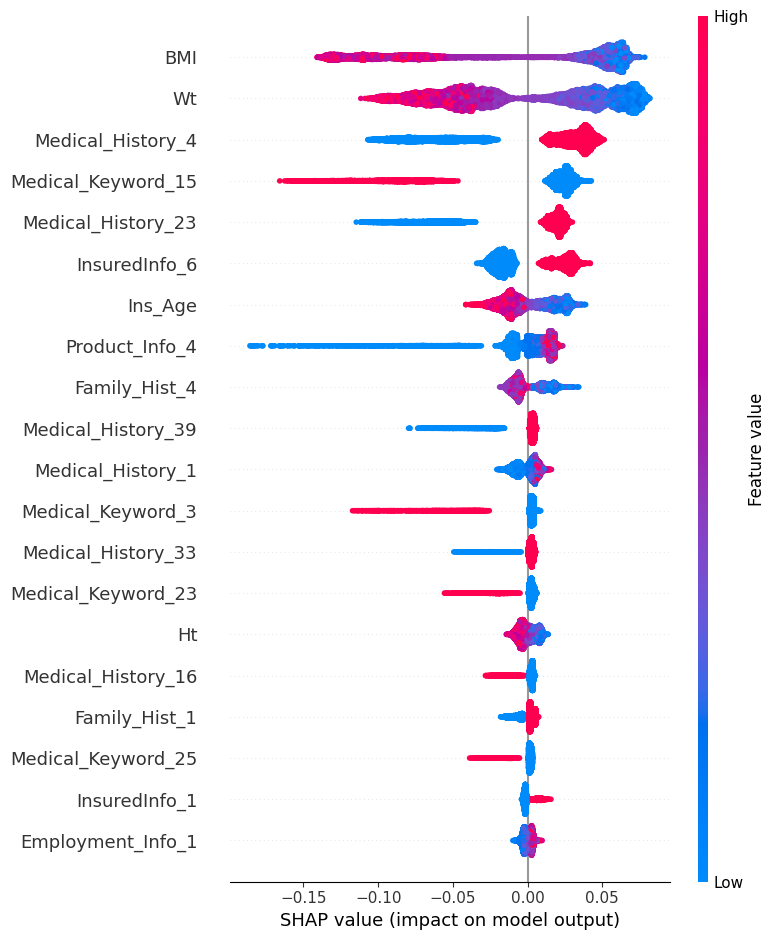

In [ ]:
shap_values = shap.TreeExplainer(rf_optimal_model).shap_values(X_test)
shap.summary_plot(shap_values[1],X_test) # you can do it for class 1 and 2 alos
# the summary of class where the application were accepted

The red represent high value of features, blue represents low value of feautures

We can see that having the BMI feature value high is bascically contirbuting towards negative class where as having low value of BMI feature is contributing toward the prediction of positive class. Same can be deduced for the rest of the class for other features

Let's see the age feautres , the high value of age is making the prediction towards the negative side were as the low value of age is making the prediction towards the positive side

The features represtation are quite intutive if we look at it carefully

The ranking of the features are based on importance

## We can also use the dependence plot for features engineering

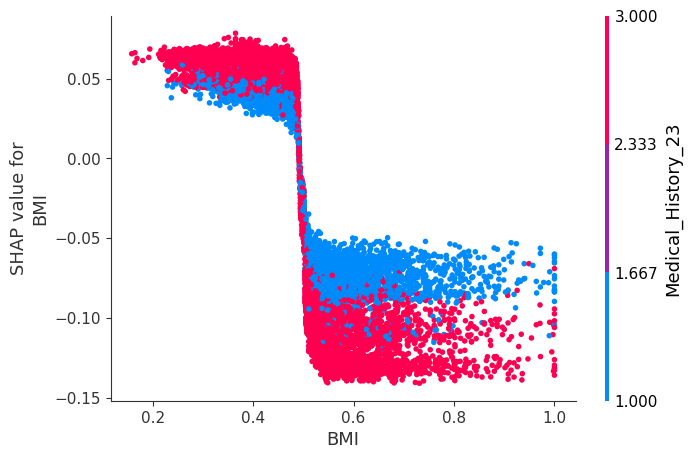

<Figure size 640x480 with 0 Axes>

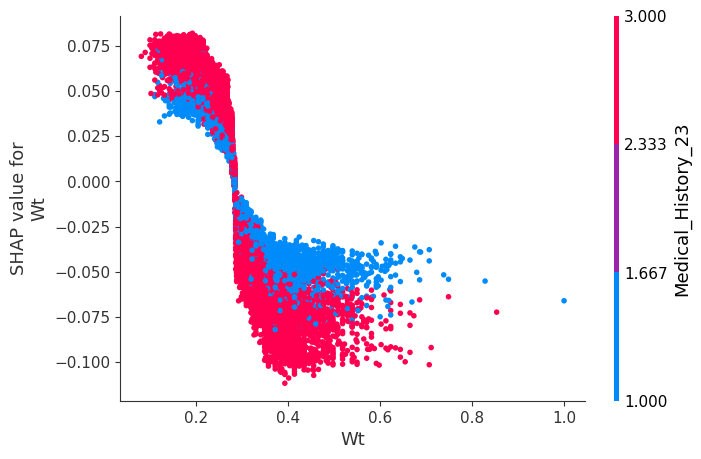

<Figure size 640x480 with 0 Axes>

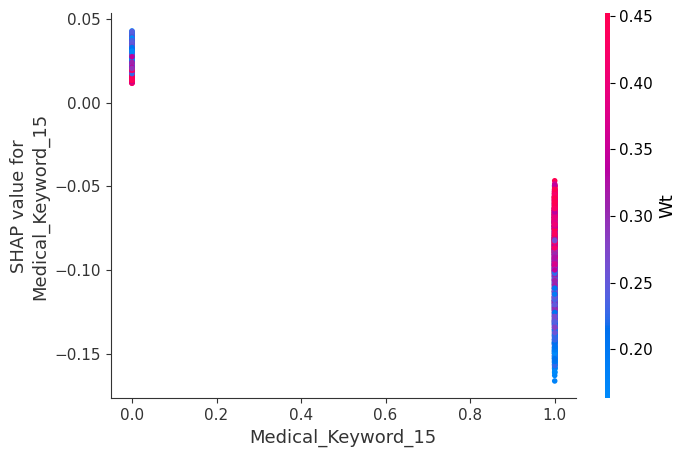

<Figure size 640x480 with 0 Axes>

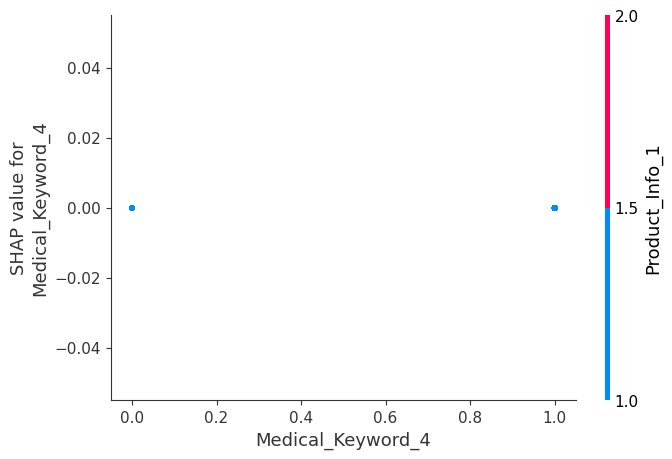

<Figure size 640x480 with 0 Axes>

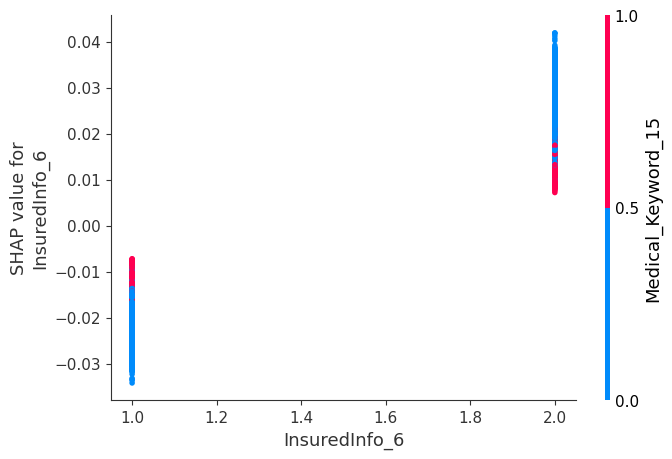

<Figure size 640x480 with 0 Axes>

In [ ]:
# Let's do a dependence plot of top features
top_var = ['BMI', 'Wt', 'Medical_Keyword_15','Medical_Keyword_4', 'InsuredInfo_6']
for i in top_var:
  shap.dependence_plot(i, shap_values[1],X_test)
  plt.tight_layout()
  plt.show()

 # let's look at the firt plot the low value of bmi and high value of medical_history_23 are contributing towards postive clas prediction
 # where as the high value of bmi and the lwo value of medical history are contributing away from postive class
 # similarly we are interpret for the rest of the fearures as well
 # so we can do feature engineering lets say we can make a features combine 2 features

In [ ]:
pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=e22929ba147ca74a989d4aeee8193e50900ad7dc37170b0d8f63d192709bfc2d
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
import eli5 as eli
# Weights for Random Forest at global level using ELI5
eli.explain_weights(rf_optimal_model,feature_names = X_train.columns.tolist())
# values which you see under the weights section are basically gini index which will be between 0 and 1

Explanation(estimator='RandomForestClassifier(max_depth=8, min_samples_leaf=40, min_samples_split=150,\n                       n_estimators=80)', description='\nRandom forest feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='BMI', weight=0.2293202892988781, std=0.18429690973157598, value=None), FeatureWeight(feature='Wt', weight=0.1771634847880025, std=0.16857768046575353, value=None), FeatureWeight(feature='Medical_Keyword_15', weight=0.11903966464701465, std=0.13115170022677994, value=None), FeatureWeight(feature='Medical_History_4', weight=0.09901920449537772, std=0.08949428833615884, value=None), FeatureWeight(feature='Medical_History_23', weight=0.09444452484835135, std=0.11601164762047235, value=None), FeatureWeight(feature='InsuredInfo_6', weight=0.03864247845264399, std=0.0501211523496941, value=None), FeatureWeight(feature='Product_Info_4', weight=0.03846628992261145, std=0.037325314791496284, value=None), FeatureWeight(feature='Ins_Age', weight=0.033487839497200966, std=0.047113823731732764, value=None), FeatureWeight(feature='Family_Hist_4', weight=0.018035632383186662, std=0.02915475525863843, value=None), FeatureWeight(feature='Medical_Keyword_3', weight=0.017030063054379777, std=0.02403518958152962, value=None), FeatureWeight(feature='Ht', weight=0.01567767477887407, std=0.024537803928236766, value=None), FeatureWeight(feature='Medical_History_39', weight=0.01374591359253511, std=0.020707198540765567, value=None), FeatureWeight(feature='Medical_History_33', weight=0.009870259101398196, std=0.016676074802396374, value=None), FeatureWeight(feature='Medical_Keyword_23', weight=0.009676646801171638, std=0.014444135581438516, value=None), FeatureWeight(feature='Medical_History_1', weight=0.007665327774726302, std=0.01384092785305811, value=None), FeatureWeight(feature='Medical_Keyword_25', weight=0.007216961387364471, std=0.015833358155174566, value=None), FeatureWeight(feature='Medical_History_16', weight=0.007110808303522385, std=0.015276991970929273, value=None), FeatureWeight(feature='Medical_Keyword_48', weight=0.005324366690809937, std=0.014865542254559126, value=None), FeatureWeight(feature='Medical_History_6', weight=0.00505235228605877, std=0.011988524474912594, value=None), FeatureWeight(feature='Medical_History_30', weight=0.004971268478075556, std=0.008752642185221133, value=None)], remaining=97), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [ ]:
# let's do eli5 of a instance
# this will show the values, name of the featues also
eli.show_prediction(rf_optimal_model, np.array(X_test.iloc[0,:]),
                    feature_names=X_train.columns.tolist(),
                    show_feature_values=True)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


The values in the green means they are positively contributing towards the prediction of that class

# let's build Logistics Regression model  

In [56]:
# let's build a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [183]:
param_grid = {
    'C':[0.001, 0.01, 0.1, 1, 10],
    'penalty':['l1','l2'],
} #'solver': ['liblinear', 'lbfgs', 'saga'] # C is regalrization parameter

In [184]:
log_ = LogisticRegression()

In [190]:
model_log = GridSearchCV(estimator=log_, scoring = 'accuracy',param_grid=param_grid, cv=5)
model_log.fit(X_train,Y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [191]:
model_log.best_params_

{'C': 10, 'penalty': 'l2'}

In [192]:
model_log.best_score_

0.750174020433367

In [193]:
best_model_log = model_log.best_estimator_

In [205]:
# Test score
accuracy_score(Y_test,test_pred_log)

0.7514482015357672

In [195]:
# let's just make the confusion matrix of only test data set
test_pred_log = best_model_log.predict(X_test)

In [196]:
from sklearn.metrics import confusion_matrix

In [198]:
confusion_matrix(Y_test,test_pred_log)

array([[8398, 1587],
       [2103, 2758]])

[[TN, FP]

[FN, TP]]

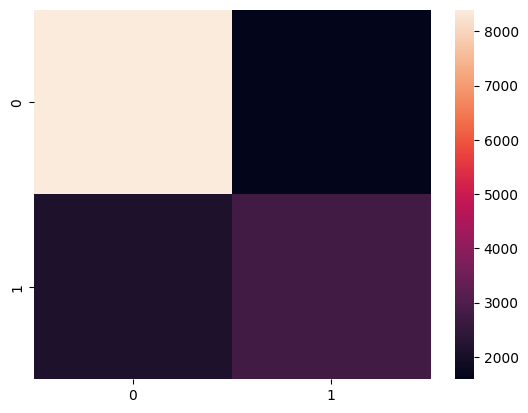

In [200]:
sns.heatmap(confusion_matrix(Y_test,test_pred_log))
plt.show()

In [203]:
# precison
#TP/TP+FP
2758/(2758+1587)
# this model has a better precision than the random forest which means that the if the model says 100 times postive then 63 times its is postive

0.634752589182969

In [204]:
# recall # TP/TP+FN
2758/(2758+2103) # a very poor model in terms of recall it is not able to recall 44% of positive classes it is not able to recall

0.5673729685249949

In [81]:
# let's calculate the roc_auc score
from sklearn.metrics import roc_auc_score

In [202]:
roc_auc_score(Y_test,test_preds)

0.8855605976337475

# Let's make a Decision Tree model

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [212]:
decision_tree_classifer = DecisionTreeClassifier()

In [72]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5],
    'min_samples_split': [2, 3, 4]
}

# Initialize a Decision Tree Classifier
dtc = DecisionTreeClassifier()

# Initialize the Grid Search CV
model_dt = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5)

# Fit the data to the GridSearchCV
model_dt.fit(X_train, Y_train)

# Get the best parameters
best_params = model_dt.best_params_

print(f"The best parameters are: {best_params}")


The best parameters are: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 4}


In [59]:
from sklearn.metrics import accuracy_score

In [75]:
optimal_dt=model_dt.best_estimator_

In [78]:
# train accuracy
accuracy_score(Y_train,optimal_dt.predict(X_train))

0.8095206017738857

In [79]:
# test accuracy
accuracy_score(Y_test,optimal_dt.predict(X_test) )

0.809847770443217

In [82]:
roc_auc_score(Y_test,optimal_dt.predict(X_test))

0.7974608590524133

In [84]:
roc_auc_score(Y_train,optimal_dt.predict(X_train))

0.7982456169224404

In [85]:
# has low a reciever operator characterstics score than random forest

# Lets fit a Gradient Boosting algorithm

In [87]:
from sklearn.ensemble import GradientBoostingClassifier

In [90]:
param_grid = {
    'learning_rate': [ 0.1, 1],
    'n_estimators': [10, 15],
    'max_depth': [2,3]
}
# the learning rate is here which we apply to control the overfitting of the decision tree after the prediction of baseline model and rest

In [92]:
# Initialize a Gradient Boosting Classifier
gbc = GradientBoostingClassifier()

# Initialize the Grid Search CV
model_gb = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5)

# Fit the data to the GridSearchCV
model_gb.fit(X_train, Y_train)

NameError: ignored

In [93]:
# Get the best parameters
best_params = model_gb.best_params_

print(f"The best parameters are: {best_params}")

The best parameters are: {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 15}


In [94]:
accuracy_score(Y_train,model_gb.best_estimator_.predict(X_train))

0.8278657235881891

In [95]:
accuracy_score(Y_test,model_gb.best_estimator_.predict(X_test))

0.8215007409403207

In [96]:
roc_auc_score(Y_train,model_gb.best_estimator_.predict(X_train))

0.8076961571026046

In [97]:
roc_auc_score(Y_test,model_gb.best_estimator_.predict(X_test))

0.7985229026423815

##Though we have a good accuracy score in gradient boosting but the roc_auc is less than the random forest, the closer the roc_auc score to 1 the better the model is at distinguishing between 0 and 1
##This points out to the fact that we have a slightly imbalance dataset (target variable)

In [98]:
from xgboost import XGBClassifier

In [99]:
param_grid = {
    'learning_rate': [0.1, 1],
    'n_estimators': [10, 15],
    'max_depth': [2,3]
}

In [100]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb = GridSearchCV(estimator = xgb,param_grid = param_grid, cv = 5)
model_xgb.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 1], 'max_depth': [2, 3],
                         'n_estimators': [10, 15]})

In [102]:
model_xgb.best_params_

{'learning_rate': 1, 'max_depth': 3, 'n_estimators': 15}

In [103]:
accuracy_score(Y_train,model_xgb.best_estimator_.predict(X_train))

0.8284495340743235

In [104]:
accuracy_score(Y_test,model_xgb.best_estimator_.predict(X_test))

0.8239256365350937

In [105]:
roc_auc_score(Y_train,model_xgb.best_estimator_.predict(X_train))

0.8101564912755382

In [106]:
roc_auc_score(Y_test,model_xgb.best_estimator_.predict(X_test))

0.8028064726177933

the roc_auc is better than gradient boosting

# Let's try adaboost

In [109]:
from sklearn.ensemble import AdaBoostClassifier

In [110]:
param_grid = {
    'n_estimators':[10,15],
    'learning_rate':[0.1,1]
}

In [113]:
abc = AdaBoostClassifier()
model_abc = GridSearchCV(estimator = abc , param_grid = param_grid, cv = 5 )
model_abc.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 1], 'n_estimators': [10, 15]})

In [114]:
model_abc.best_params_

{'learning_rate': 1, 'n_estimators': 15}

In [115]:
accuracy_score(Y_train,model_abc.best_estimator_.predict(X_train))

0.816122151117099

In [116]:
accuracy_score(Y_test,model_abc.best_estimator_.predict(X_test))

0.8170550990165701

In [117]:
roc_auc_score(Y_train,model_abc.best_estimator_.predict(X_train))

0.8037021925475125

In [118]:
roc_auc_score(Y_test,model_abc.best_estimator_.predict(X_test))

0.8028716804892588

# So we can concluded that in terms of accuracy and reciver operator chartistics curve random forest is the best model for the dataset which we have